Michael O'Donnell

Dr. Shawn Walker

STC 551: Social Computational Structures II

05/04/2023

The purpose of this assignment is to gather articles related to our chosen research project. We then should use Topic Modeling to analyze what we find. To do so, we should use LDA and GDSMM algorithms. Once we have those results, we combine one of our choosing with a social network analysis. This will give us further insights into one of our topics. We then should describe and summarize our findings with a few questions provided by the professor. This assignment will help students get further insights into what topics news outlets are discussing when it comes to our research projects.


I followed along 2 different articles to assist me in completing this assignment.

The first article, this is for LDA:

https://towardsdatascience.com/hands-on-topic-modeling-with-python-1e3466d406d7

The second article, this is for GSDMM:

https://towardsdatascience.com/gsdmm-topic-modeling-for-social-media-posts-and-reviews-8726489dc52f

In [ ]:
#Code to install the newsapi-python module
!pip install newsapi-python

#installs the natural language toolkit
!pip install nltk

#Installs Counter
!pip install Counter

#Installs Pandas
!pip install pandas

#Installs numpy package
!pip install numpy

#Installs the GDSMM algorithm from Github
!pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-t7kige3u
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-t7kige3u
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done


pyLDAvis displays a visual for the LDA algorithms. When I run this it seems to break everything in the code now, but it was working. Since it is not crucial to the code, I am going to omit it; however, I am going to keep it commented out because the code was working at one point

In [ ]:
#Installs pyLDAvis
#!pip install pyLDAvis

In [ ]:
#Accesses my google drive account
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#Imports all of the libraries needed for the assignment
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("fivethirtyeight")
import matplotlib.patheffects as path_effects

import gensim

np.random.seed(493)

import json
import csv

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
ps = nltk.porter.PorterStemmer()

from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import unicodedata
import re

from gsdmm import MovieGroupProcess

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Loads the newsAPI python module and connect to the API
from newsapi import NewsApiClient

#Sets my api key to access the api
newsapi = NewsApiClient(api_key='7282ef4309814925bfb026fb9adc0fc3')

In [ ]:
#These use the NewsAPI to gather headlines and sets them to variables in JSON format
headlines1 = newsapi.get_everything(q='mental illness social media',
language='en',
page_size=100)

headlines2 = newsapi.get_everything(q='depression tiktok',
language='en',
page_size=100)

headlines3 = newsapi.get_everything(q='hashtag tiktok',
language='en',
page_size=100)

headlines4 = newsapi.get_everything(q='tiktok community',
language='en',
page_size=100)

headlines5 = newsapi.get_everything(q='tiktok mental illness',
language='en',
page_size=100)

headlines6 = newsapi.get_everything(q='hashtag depression',
language='en',
page_size=100)

headlines7 = newsapi.get_everything(q='hashtag mental illness',
language='en',
page_size=100)

For the above code, I tried to collect more than 100 pages for some topics and was thrown an error becuase one needs a paid account to do so.

In [ ]:
#sets all of the collected api headlines to dataframes
#Source: https://deallen7.medium.com/how-to-create-a-pandas-dataframe-from-an-api-endpoint-in-a-jupyter-notebook-f2561f766ca3
df1 = pd.DataFrame(headlines1['articles'])
df2 = pd.DataFrame(headlines2['articles'])
df3 = pd.DataFrame(headlines3['articles'])
df4 = pd.DataFrame(headlines4['articles'])
df5 = pd.DataFrame(headlines5['articles'])
df6 = pd.DataFrame(headlines6['articles'])
df7 = pd.DataFrame(headlines7['articles'])

In [ ]:
#Merges together all of the different dataframes of the articles that were collected into one dataframe
#Source: https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes
df_merged = pd.concat([df1, df2, df2, df3, df4, df5, df6, df7], ignore_index = True,sort=False)

In [ ]:
#sets the columns of 'description' and 'content' to only be displayed in the dataframe of the api data
df_merged = df_merged[['description', 'content']]

In [ ]:
#drops duplicated articles
df_merged = df_merged.drop_duplicates()

In [ ]:
#drops rows with any missing data
df_merged = df_merged.dropna()



---



This section will us the GSDMM alrogithm for both the Description and Content fields

In [ ]:
#Sets the description column to a new dataframe
df_description_gsdmm = df_merged['description']

In [ ]:
#Functions to preprocess the data to be put into the algorithm
#These clean special characters, removes stopwords, and stems the tokens
def basic_clean(original):
    word = original.lower()
    word = unicodedata.normalize('NFKD', word)\
                                .encode('ascii', 'ignore')\
                                .decode('utf-8', 'ignore')
    word = re.sub(r"[^a-z0-9'\s]", '', word)
    word = word.replace('\n',' ')
    word = word.replace('\t',' ')
    word = word.replace("'",' ')
    return word

def remove_stopwords(original, extra_words=[], exclude_words=[]):
    stopword_list = stopwords.words('english')

    for word in extra_words:
        stopword_list.append(word)
    for word in exclude_words:
        stopword_list.remove(word)

    words = original.split()
    filtered_words = [w for w in words if w not in stopword_list]

    original_nostop = ' '.join(filtered_words)

    return original_nostop

def stem(original):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in original.split()]
    original_stemmed = ' '.join(stems)
    return original_stemmed

docs = []
for sentence in df_description_gsdmm:
    words = word_tokenize(stem(remove_stopwords(basic_clean(sentence))))
    docs.append(words)

In [ ]:
#The movie group process is called to cluster the topics
mgp = MovieGroupProcess(K=15, alpha=0.1, beta=1, n_iters=30)

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)

y = mgp.fit(docs, n_terms)

In stage 0: transferred 409 clusters with 15 clusters populated
In stage 1: transferred 272 clusters with 15 clusters populated
In stage 2: transferred 150 clusters with 14 clusters populated
In stage 3: transferred 125 clusters with 12 clusters populated
In stage 4: transferred 88 clusters with 10 clusters populated
In stage 5: transferred 80 clusters with 7 clusters populated
In stage 6: transferred 94 clusters with 6 clusters populated
In stage 7: transferred 100 clusters with 6 clusters populated
In stage 8: transferred 88 clusters with 7 clusters populated
In stage 9: transferred 88 clusters with 6 clusters populated
In stage 10: transferred 89 clusters with 6 clusters populated
In stage 11: transferred 82 clusters with 8 clusters populated
In stage 12: transferred 90 clusters with 7 clusters populated
In stage 13: transferred 87 clusters with 7 clusters populated
In stage 14: transferred 69 clusters with 7 clusters populated
In stage 15: transferred 80 clusters with 8 clusters po

In [ ]:
#Displays the number of documents per topic
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [ 62   5   0   0  44   0   0   0   0   0  44  39   0 274   2]


In [ ]:
#Displays the cluster in descending order from most important to least important.
#This means by which cluster has more documents
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside): ', top_index)

Most important clusters (by number of docs inside):  [13  0 10  4 11  1 14 12  9  8  7  6  5  3  2]


In [ ]:
#Reorganizes the clusters
def top_words(cluster_word_distribution, top_cluster, values):
  for cluster in top_cluster:
    sort_dics = sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
    print('Cluster %s: %s'%(cluster,sort_dics))
    print('-'*120)


In [ ]:
#Displays terms within each cluster (topic) and how often they are used
top_words(mgp.cluster_word_distribution, top_index, 7)

Cluster 13: [('tiktok', 62), ('media', 62), ('social', 60), ('mental', 46), ('peopl', 36), ('health', 34), ('like', 30)]
------------------------------------------------------------------------------------------------------------------------
Cluster 0: [('year', 14), ('get', 12), ('day', 11), ('last', 10), ('week', 8), ('news', 8), ('month', 8)]
------------------------------------------------------------------------------------------------------------------------
Cluster 10: [('tiktok', 27), ('dylan', 12), ('mulvaney', 12), ('new', 10), ('video', 10), ('music', 9), ('brand', 7)]
------------------------------------------------------------------------------------------------------------------------
Cluster 4: [('children', 11), ('data', 10), ('school', 9), ('three', 9), ('shoot', 8), ('nashvil', 8), ('law', 7)]
------------------------------------------------------------------------------------------------------------------------
Cluster 11: [('season', 7), ('new', 6), ('game', 6), ('s

In [ ]:
#Renames clusters to topics
topic_dict = {}
topic_names = ['Topic #1',
               'Topic #2',
               'Topic #3',
               'Topic #4',
               'Topic #5',
               'Topic #6',
               'Topic #7',
               'Topic #8',
               'Topic #9',
               'Topic #10',
               'Topic #11',
               'Topic #12',
               'Topic #13',
               'Topic #14',
               'Topic #15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]

In [ ]:
#Sets a dataframe with the original text and the topics that were assigned
#to it from the movie group process algorithm
def create_topics_dataframe(data_text=df_description_gsdmm,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, stem_text=docs):
    result = pd.DataFrame(columns=['text', 'topic', 'stems'])
    for i, text in enumerate(data_text):
        result.at[i, 'text'] = text
        result.at[i, 'stems'] = stem_text[i]
        prob = mgp.choose_best_label(stem_text[i])
        if prob[1] >= threshold:
            result.at[i, 'topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'topic'] = 'Other'
    return result

In [ ]:
#Creates the above dataframe
dfx = create_topics_dataframe(data_text=df_description_gsdmm
                              ,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, stem_text=docs)

In [ ]:
#Prints the head of the new dataframe
dfx.head()

,text,topic,stems
0,Jonathan Haidt responds to critics and offers six propositions for evaluating the evidence.,Topic #1,"[jonathan, haidt, respond, critic, offer, six, proposit, evalu, evid]"
1,"Gender-affirming healthcare is now much more difficult, nigh impossible, to access in Missouri, even for adults. Medical treatments, including hormones, puberty blockers, and surgeries, though widely accepted as safe and critically important for many transgen…",Topic #1,"[genderaffirm, healthcar, much, difficult, nigh, imposs, access, missouri, even, adult, medic, treatment, includ, hormon, puberti, blocker, surgeri, though, wide, accept, safe, critic, import, mani, transgen]"
2,"'National Enquirer'\n\n\n\n""King Charles' Battle With Mental Illness Exposed!"" screams the front page headline.\n\n\n\n\n\n\n\nThe evidence is hard to refute: ""Talks to plants & his dead uncle! Actually fears he'll become a werewolf! Can't sleep without favourite teddy b…",Topic #4,"[nation, enquir, king, charl, battl, mental, ill, expos, scream, front, page, headlin, evid, hard, refut, talk, plant, dead, uncl, actual, fear, becom, werewolf, sleep, without, favourit, teddi, b]"
3,Going after minor misdeeds will add to police workloads and likely fuel vigilantismWhat happens when the human instinct to hunt down wrongdoers is encouraged to bloom and spread beyond the bounds of an ordinary justice system – the sort with clear rules about…,Topic #6,"[go, minor, misde, add, polic, workload, like, fuel, vigilantismwhat, happen, human, instinct, hunt, wrongdoer, encourag, bloom, spread, beyond, bound, ordinari, justic, system, sort, clear, rule]"
4,"Why the mental health of teens collapsed at the same time and in the same way in the USA, the UK, Canada, Australia, and New Zealand. By Zach Rausch and Jon Haidt.",Topic #1,"[mental, health, teen, collaps, time, way, usa, uk, canada, australia, new, zealand, zach, rausch, jon, haidt]"


In [ ]:
#Shows the distribution of each topic
dfx.topic.value_counts(dropna=False)

Topic #1    273
Topic #2     62
Topic #3     45
Topic #4     44
Topic #5     39
Topic #6      5
Topic #7      2
Name: topic, dtype: int64

Now the content portion of the articles will be used with the GSDMM alogrithm

In [ ]:
#Sets the description column to a new dataframe
df_content_gsdmm = df_merged['content']

In [ ]:
#Functions to preprocess the data to be put into the algorithm
#These clean special characters, removes stopwords, and stems the tokens
def basic_clean(original):
    word = original.lower()
    word = unicodedata.normalize('NFKD', word)\
                                .encode('ascii', 'ignore')\
                                .decode('utf-8', 'ignore')
    word = re.sub(r"[^a-z0-9'\s]", '', word)
    word = word.replace('\n',' ')
    word = word.replace('\t',' ')
    word = word.replace("'",' ')
    return word

def remove_stopwords(original, extra_words=[], exclude_words=[]):
    stopword_list = stopwords.words('english')

    for word in extra_words:
        stopword_list.append(word)
    for word in exclude_words:
        stopword_list.remove(word)

    words = original.split()
    filtered_words = [w for w in words if w not in stopword_list]

    original_nostop = ' '.join(filtered_words)

    return original_nostop

def stem(original):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in original.split()]
    original_stemmed = ' '.join(stems)
    return original_stemmed

docs = []
for sentence in df_content_gsdmm:
    words = word_tokenize(stem(remove_stopwords(basic_clean(sentence))))
    docs.append(words)

In [ ]:
#The movie group process is called to cluster the topics
mgp = MovieGroupProcess(K=15, alpha=0.1, beta=1, n_iters=30)

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)

y = mgp.fit(docs, n_terms)

In stage 0: transferred 388 clusters with 14 clusters populated
In stage 1: transferred 197 clusters with 9 clusters populated
In stage 2: transferred 122 clusters with 7 clusters populated
In stage 3: transferred 85 clusters with 7 clusters populated
In stage 4: transferred 90 clusters with 7 clusters populated
In stage 5: transferred 78 clusters with 7 clusters populated
In stage 6: transferred 83 clusters with 7 clusters populated
In stage 7: transferred 78 clusters with 7 clusters populated
In stage 8: transferred 70 clusters with 7 clusters populated
In stage 9: transferred 64 clusters with 6 clusters populated
In stage 10: transferred 63 clusters with 5 clusters populated
In stage 11: transferred 70 clusters with 6 clusters populated
In stage 12: transferred 70 clusters with 5 clusters populated
In stage 13: transferred 55 clusters with 5 clusters populated
In stage 14: transferred 55 clusters with 6 clusters populated
In stage 15: transferred 62 clusters with 5 clusters populate

In [ ]:
#Displays the number of documents per topic
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [136   0   0   0   0   0 189   0   0   8  19   0   0   0 118]


In [ ]:
#Displays the cluster in descending order from most important to least important.
#This means by which cluster has more documents
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside): ', top_index)

Most important clusters (by number of docs inside):  [ 6  0 14 10  9 13 12 11  8  7  5  4  3  2  1]


In [ ]:
#Reorganizes the clusters
def top_words(cluster_word_distribution, top_cluster, values):
  for cluster in top_cluster:
    sort_dics = sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
    print('Cluster %s: %s'%(cluster,sort_dics))
    print('-'*120)

In [ ]:
#Displays terms within each cluster (topic) and how often they are used
top_words(mgp.cluster_word_distribution, top_index, 7)

Cluster 6: [('char', 189), ('tiktok', 54), ('mental', 44), ('media', 39), ('social', 37), ('health', 34), ('school', 24)]
------------------------------------------------------------------------------------------------------------------------
Cluster 0: [('char', 136), ('tiktok', 31), ('day', 20), ('like', 20), ('year', 19), ('one', 18), ('video', 17)]
------------------------------------------------------------------------------------------------------------------------
Cluster 14: [('char', 117), ('tiktok', 25), ('imag', 23), ('2023', 16), ('dylan', 15), ('star', 15), ('brand', 14)]
------------------------------------------------------------------------------------------------------------------------
Cluster 10: [('free', 25), ('char', 19), ('fashion', 18), ('trend', 17), ('stay', 16), ('ahead', 16), ('beyond', 16)]
------------------------------------------------------------------------------------------------------------------------
Cluster 9: [('char', 8), ('nomine', 5), ('peabod

In [ ]:
#Renames clusters to topics
topic_dict = {}
topic_names = ['Topic #1',
               'Topic #2',
               'Topic #3',
               'Topic #4',
               'Topic #5',
               'Topic #6',
               'Topic #7',
               'Topic #8',
               'Topic #9',
               'Topic #10',
               'Topic #11',
               'Topic #12',
               'Topic #13',
               'Topic #14',
               'Topic #15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]

In [ ]:
#Sets a dataframe with the original text and the topics that were assigned
#to it from the movie group process algorithm
def create_topics_dataframe(data_text=df_content_gsdmm,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, stem_text=docs):
    result = pd.DataFrame(columns=['text', 'topic', 'stems'])
    for i, text in enumerate(data_text):
        result.at[i, 'text'] = text
        result.at[i, 'stems'] = stem_text[i]
        prob = mgp.choose_best_label(stem_text[i])
        if prob[1] >= threshold:
            result.at[i, 'topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'topic'] = 'Other'
    return result

In [ ]:
#Creates the above dataframe
dfy = create_topics_dataframe(data_text=df_content_gsdmm,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, stem_text=docs)

In [ ]:
#Prints the head of the new dataframe
dfy.head()

,text,topic,stems
0,"In the first eight posts of the After Babel substack, we have laid out the evidence that an epidemic of mental illness began around 2012, simultaneously in the USA, UK, Canada, Australia, and New Zea… [+36084 chars]",Topic #1,"[first, eight, post, babel, substack, laid, evid, epidem, mental, ill, began, around, 2012, simultan, usa, uk, canada, australia, new, zea, 36084, char]"
1,"Gender-affirming healthcare is now much more difficult, nigh impossible, to access in Missouri, even for adults. Medical treatments, including hormones, puberty blockers, and surgeries, though widely… [+7122 chars]",Topic #1,"[genderaffirm, healthcar, much, difficult, nigh, imposs, access, missouri, even, adult, medic, treatment, includ, hormon, puberti, blocker, surgeri, though, wide, 7122, char]"
2,"""King Charles' Battle With Mental Illness Exposed!"" screams the front page headline.\r\nThe evidence is hard to refute: ""Talks to plants &amp; his dead uncle! Actually fears he'll become a werewolf! Ca… [+6904 chars]",Topic #1,"[king, charl, battl, mental, ill, expos, scream, front, page, headlin, evid, hard, refut, talk, plant, amp, dead, uncl, actual, fear, becom, werewolf, ca, 6904, char]"
3,What happens when the human instinct to hunt down wrongdoers is encouraged to bloom and spread beyond the bounds of an ordinary justice system the sort with clear rules about right and wrong and whic… [+5414 chars],Topic #2,"[happen, human, instinct, hunt, wrongdoer, encourag, bloom, spread, beyond, bound, ordinari, justic, system, sort, clear, rule, right, wrong, whic, 5414, char]"
4,"It is now widely accepted that an epidemic of mental illness began among American teens in the early 2010s. What caused it? Many commentators point to events in the USA around that time, such as a pa… [+27295 chars]",Topic #1,"[wide, accept, epidem, mental, ill, began, among, american, teen, earli, 2010, caus, mani, comment, point, event, usa, around, time, pa, 27295, char]"


In [ ]:
#Shows the distribution of each topic
dfy.topic.value_counts(dropna=False)

Topic #1    189
Topic #2    136
Topic #3    118
Topic #4     19
Topic #5      8
Name: topic, dtype: int64



---



This section takes the description and content from the NewsAPI and puts it through the LDA algorithm to find the topics another way.

In [ ]:
#Sets the original dataframe to a new variable to be manipulated
df_description_lda = df_merged

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
#Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings
def text_preprocessing(text):

  #makes all text lowercase
  text = text.lower()

  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
  text = " ".join(new_text)

  #formats words and removes unwanted characters
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  text = re.sub(r'\'', ' ', text)
  text = re.sub(r'\'', ' ', text)

  #Tokenize each word
  text = nltk.WordPunctTokenizer().tokenize(text)

  #Lemmatize each word
  text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

  return text

#convert list to string
def to_string(text):
  text = ' '.join(map(str, text))
  return text

In [ ]:
#Creates a new column in the dataframe of processed data
df_description_lda['description_clean_list'] = list(map(text_preprocessing, df_description_lda.description))

In [ ]:
#Creates a new column in the dataframe of processed data
df_description_lda['description_clean'] = list(map(to_string, df_description_lda['description_clean_list']))

In [ ]:
#Displays an example from the new dataframe
pd.set_option('display.max_colwidth', 15000)
df_description_lda.sample()

,description,content,description_clean_list,description_clean
544,"Seeing this screenshot of an old, now-deleted TikTok video of Dylan Mulvaney from 2021 where he was very upset about not being able to find work UNTIL his friend wrote him a femme character is pretty damn eye-opening. Guess we understand why it’s deleted. Ahe…","Skip to comments.\r\nOld, now-deleted TikTok video exposes who Dylan Mulvaney REALLY is and what hes up to (screenshot)Twitchy ^\r\n | April 18, 2023\r\n | Sam Janney\r\nPosted on 04/19/2023 1:33:27 PM PDT b… [+2690 chars]","[see, this, screenshot, of, an, old, now, delete, tiktok, video, of, dylan, mulvaney, from, 2021, where, he, be, very, upset, about, not, be, able, to, find, work, until, his, friend, write, him, femme, character, be, pretty, damn, eye, open, guess, we, understand, why, it, delete, ahe]",see this screenshot of an old now delete tiktok video of dylan mulvaney from 2021 where he be very upset about not be able to find work until his friend write him femme character be pretty damn eye open guess we understand why it delete ahe


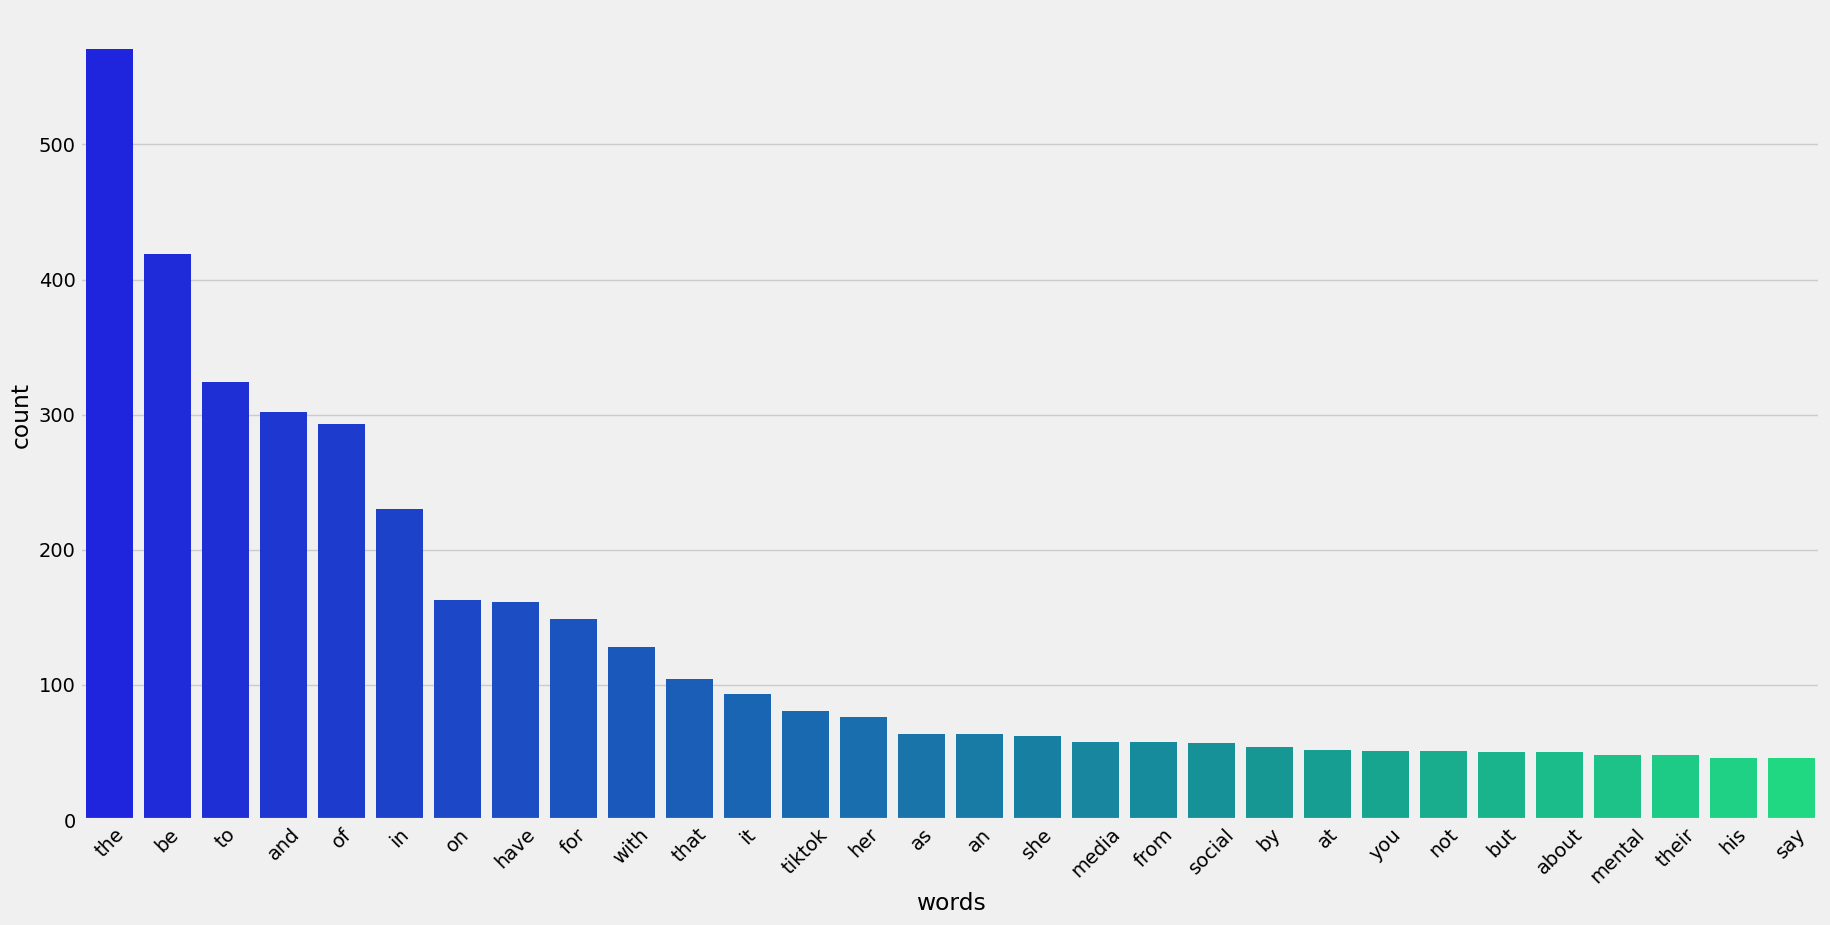

In [ ]:
#Imports counter, needs to be done each code block its used for some reason
from collections import Counter

#joins all words into a corpus
description_words = ','.join(list(df_description_lda['description_clean'].values))

#counts and finds 30 of the most frequent words
Counter = Counter(description_words.split())
most_frequent = Counter.most_common(30)

#bar plot of frequent words
fig = plt.figure(1, figsize = (20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [ ]:
#Exludes words that are not relevant like 'the', 'be', etc.
stopwords_list = stopwords.words('english')
stopwords_list.extend(['tiktok', 'social', 'media', 'mental'])\

df_description_lda['description_clean_list'] = [[word for word in line if word not in stopwords_list] for line in df_description_lda['description_clean_list']]
df_description_lda['description_clean'] = list(map(to_string, df_description_lda['description_clean_list']))

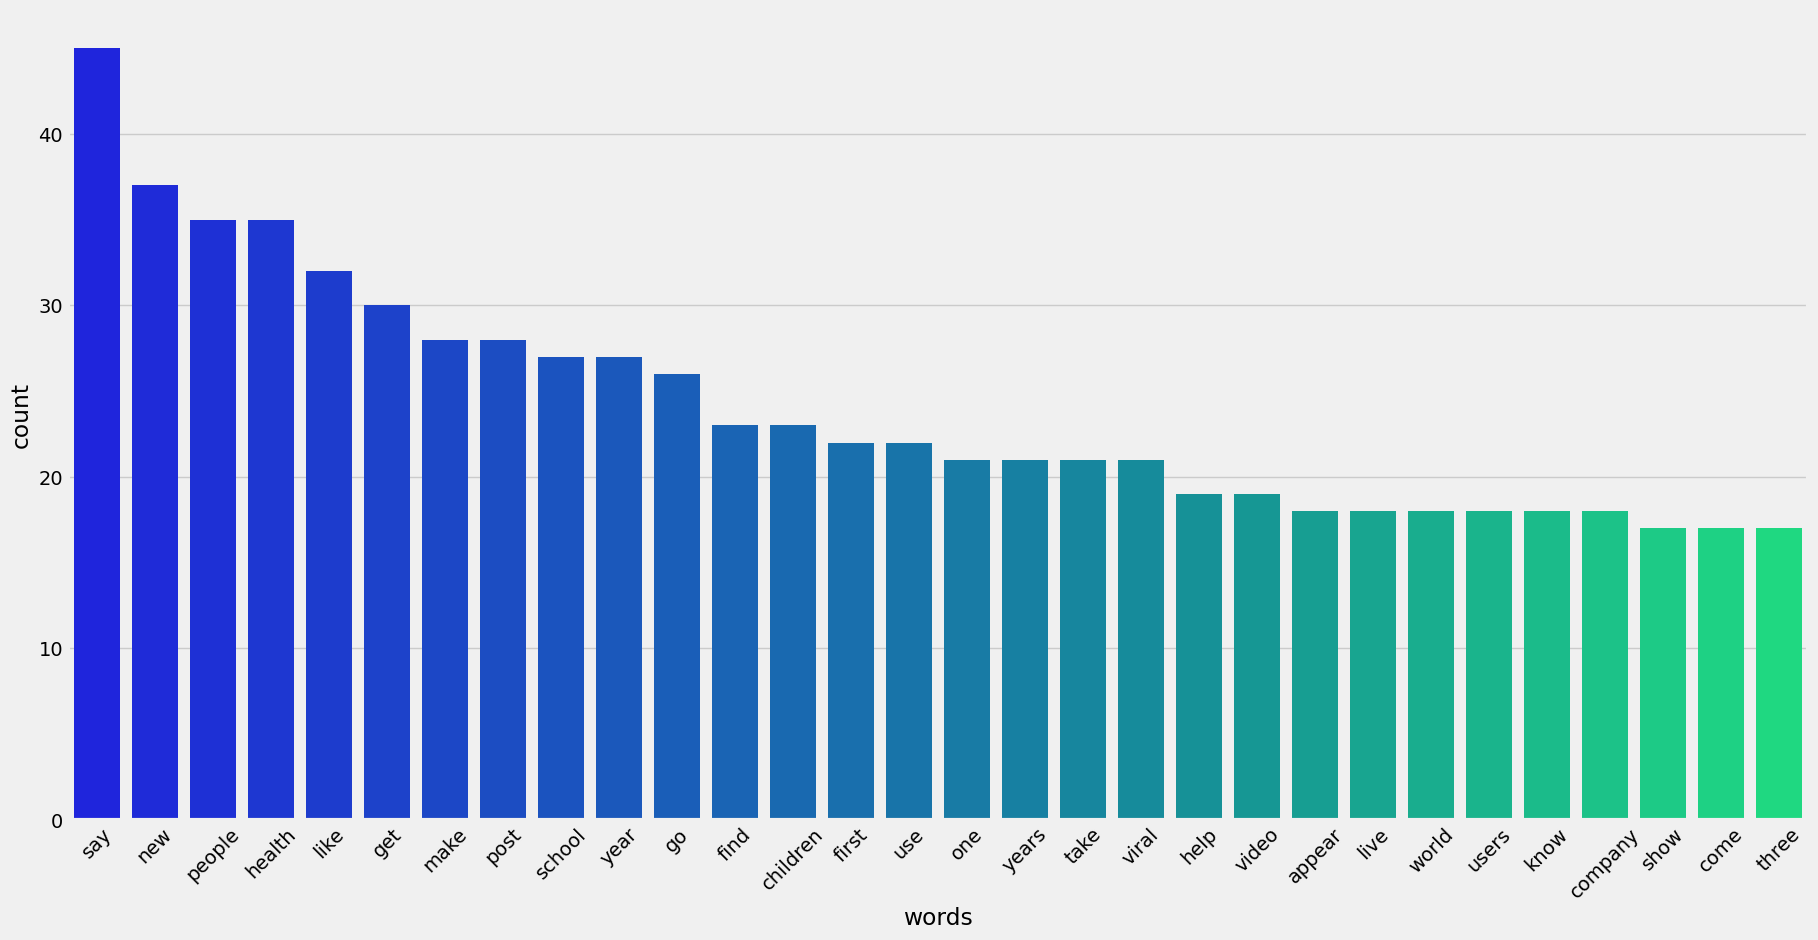

In [ ]:
#Prints another bar plot without stopwords
from collections import Counter

#Joins text together
description_words =','.join(list(df_description_lda['description_clean'].values))

#Counts each word
Counter = Counter(description_words.split())
most_frequent = Counter.most_common(30)

#Displays bar plot of most frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns = ("words","count"))
sns.barplot(x='words', y='count', data = _, palette ='winter')
plt.xticks(rotation=45);

(0.0, 1.0, 0.0, 1.0)

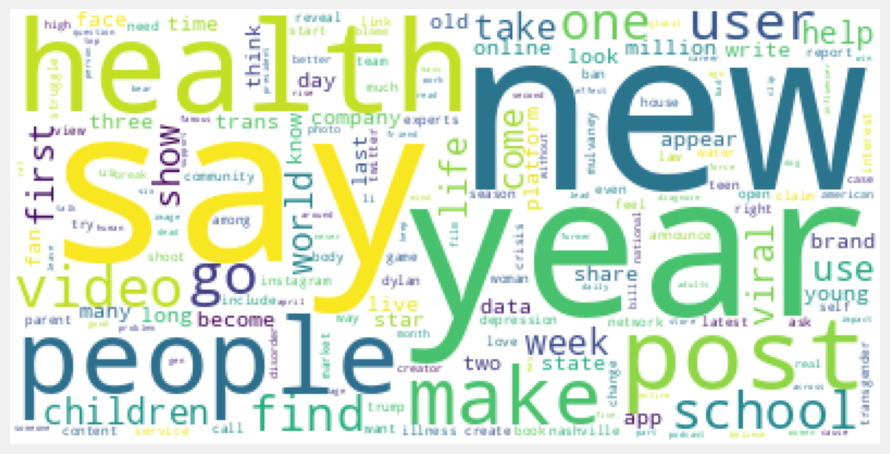

In [ ]:
#Generate word cloud
wordcloud = WordCloud(background_color="white",
                      max_words = 200,
                      contour_width = 8,
                      contour_color= "steelblue",
                      collocations=False).generate(description_words)

#Visualize the word cloud
fig = plt.figure(1, figsize = (10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
#Creates dictionary for bag of words, this prepares it for the
#lda algorithm
id2word = gensim.corpora.Dictionary(df_description_lda['description_clean_list'])

#Creates a Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_description_lda['description_clean_list']]

In [ ]:
#The topic coherence score tells us the right amount of topics there are
from gensim.models import CoherenceModel

#Compute Coherence Sore
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              iterations=50,
                                              num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=df_description_lda['description_clean_list'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda);

In [ ]:
#Create a datframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

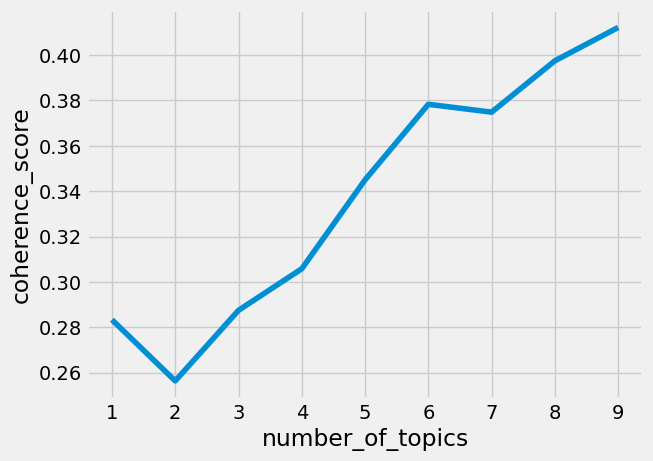

In [ ]:
#Prints a line plot
#After the line intially peaks and then dips is the amount of topics
#we should use
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
#defines number of topics
n_topics = 6

#runs the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=n_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)

In [ ]:
#Prints words occurrence and their relative weight in each topic
for idx, topic in lda_model.print_topics(-1):
  print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.019*"mulvaney" + 0.018*"trans" + 0.018*"find" + 0.018*"dylan" + 0.016*"week" + 0.013*"video" + 0.012*"viral" + 0.012*"long" + 0.011*"last" + 0.010*"call"
Topic: 1 Word: 0.019*"get" + 0.017*"post" + 0.014*"come" + 0.014*"look" + 0.012*"top" + 0.011*"first" + 0.011*"one" + 0.011*"brand" + 0.010*"really" + 0.010*"appear"
Topic: 2 Word: 0.019*"say" + 0.015*"transgender" + 0.015*"would" + 0.013*"think" + 0.013*"write" + 0.011*"like" + 0.011*"go" + 0.009*"face" + 0.009*"ban" + 0.009*"yet"
Topic: 3 Word: 0.019*"become" + 0.018*"shoot" + 0.017*"show" + 0.016*"school" + 0.014*"use" + 0.012*"community" + 0.012*"..." + 0.011*"conservatives" + 0.010*"every" + 0.008*"know"
Topic: 4 Word: 0.028*"people" + 0.020*"health" + 0.019*"new" + 0.018*"nashville" + 0.013*"two" + 0.012*"online" + 0.011*"million" + 0.010*"love" + 0.010*"time" + 0.009*"gun"
Topic: 5 Word: 0.021*"make" + 0.016*"year" + 0.014*"life" + 0.011*"world" + 0.011*"famous" + 0.011*"live" + 0.010*"report" + 0.008*"see" + 0

The below section takes the output of topics from the algorithm and preprocesses it for the SNA. I chose to do the above topic model (LDA Description) for the SNA.

In [ ]:
#Takes the topics from above and puts it into an array
sna_array = []
for topic in lda_model.print_topics(-1):
  sna_array.append(topic)

#Takes the new array and breaks it up into another array by topic
sna_set = np.array(sna_array)
sna_split = np.array_split(sna_set, 6)

#Prints the array
for i in sna_split:
  for j in i:
    print(j, end='')
  print()

#Takes each topic and puts into an array and converts from a numpy array to a
#regular array
topic0 = sna_split[0].tolist()
topic1 = sna_split[1].tolist()
topic2 = sna_split[2].tolist()
topic3 = sna_split[3].tolist()
topic4 = sna_split[4].tolist()
topic5 = sna_split[5].tolist()

#Turns the new arrays into strings to be manipulated
topic0ToStr = ' '.join([str(elem) for elem in topic0])
topic1ToStr = ' '.join([str(elem) for elem in topic1])
topic2ToStr = ' '.join([str(elem) for elem in topic2])
topic3ToStr = ' '.join([str(elem) for elem in topic3])
topic4ToStr = ' '.join([str(elem) for elem in topic4])
topic5ToStr = ' '.join([str(elem) for elem in topic5])

#removes the numbers from the strings
clean_topic0 = ''.join([i for i in topic0ToStr if not i.isdigit()])
clean_topic1 = ''.join([i for i in topic1ToStr if not i.isdigit()])
clean_topic2 = ''.join([i for i in topic2ToStr if not i.isdigit()])
clean_topic3 = ''.join([i for i in topic3ToStr if not i.isdigit()])
clean_topic4 = ''.join([i for i in topic4ToStr if not i.isdigit()])
clean_topic5 = ''.join([i for i in topic5ToStr if not i.isdigit()])

#removes the other characters from the strings
rx = re.compile('\W+')

strip_topic0 = rx.sub(' ', clean_topic0).strip()
strip_topic1 = rx.sub(' ', clean_topic1).strip()
strip_topic2 = rx.sub(' ', clean_topic2).strip()
strip_topic3 = rx.sub(' ', clean_topic3).strip()
strip_topic4 = rx.sub(' ', clean_topic4).strip()
strip_topic5 = rx.sub(' ', clean_topic5).strip()

#turns the strings back into arrays
cleaned_topic0 = strip_topic0.split()
cleaned_topic1 = strip_topic1.split()
cleaned_topic2 = strip_topic2.split()
cleaned_topic3 = strip_topic3.split()
cleaned_topic4 = strip_topic4.split()
cleaned_topic5 = strip_topic5.split()

#Prints the new arrays
print(cleaned_topic0)
print(cleaned_topic1)
print(cleaned_topic2)
print(cleaned_topic3)
print(cleaned_topic4)
print(cleaned_topic5)

['0'
 '0.019*"mulvaney" + 0.018*"trans" + 0.018*"find" + 0.018*"dylan" + 0.016*"week" + 0.013*"video" + 0.012*"viral" + 0.012*"long" + 0.011*"last" + 0.010*"call"']
['1'
 '0.019*"get" + 0.017*"post" + 0.014*"come" + 0.014*"look" + 0.012*"top" + 0.011*"first" + 0.011*"one" + 0.011*"brand" + 0.010*"really" + 0.010*"appear"']
['2'
 '0.019*"say" + 0.015*"transgender" + 0.015*"would" + 0.013*"think" + 0.013*"write" + 0.011*"like" + 0.011*"go" + 0.009*"face" + 0.009*"ban" + 0.009*"yet"']
['3'
 '0.019*"become" + 0.018*"shoot" + 0.017*"show" + 0.016*"school" + 0.014*"use" + 0.012*"community" + 0.012*"..." + 0.011*"conservatives" + 0.010*"every" + 0.008*"know"']
['4'
 '0.028*"people" + 0.020*"health" + 0.019*"new" + 0.018*"nashville" + 0.013*"two" + 0.012*"online" + 0.011*"million" + 0.010*"love" + 0.010*"time" + 0.009*"gun"']
['5'
 '0.021*"make" + 0.016*"year" + 0.014*"life" + 0.011*"world" + 0.011*"famous" + 0.011*"live" + 0.010*"report" + 0.008*"see" + 0.008*"three" + 0.008*"children"']
['mu

Commenting the visual out since importing the package was breaking other more important code

In [ ]:
#Imports and enables notebook to run visualization - prints pretty visual
#It is interactive
#import pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()

#vis = pyLDAvis.gensim_models.prepare(lda_model,
#                                     corpus,
#                                     dictionary=lda_model.id2word)
#vis

LDA analysis for the content portion of the news API

In [ ]:
#Sets the original dataframe to a new variable to be manipulated
df_content_lda = df_merged

The functions above that were used for the first LDA anaylsis can be used again to process the data

In [ ]:
#Creates a new column in the dataframe of processed data
df_content_lda['content_clean_list'] = list(map(text_preprocessing, df_content_lda.content))

In [ ]:
#Creates a new column in the dataframe of processed data
df_content_lda['content_clean'] = list(map(to_string, df_content_lda['content_clean_list']))

In [ ]:
#Displays an example from the new dataframe
pd.set_option('display.max_colwidth', 15000)
df_content_lda.sample()

,description,content,description_clean_list,description_clean,content_clean_list,content_clean
326,"The Indiana Fever can breathe a sigh of relief. South Carolina star Aliyah Boston announced she's entering the 2023 WNBA draft. The 6'5"" forward is…",John Byrum/Icon Sportswire via Getty Images\r\nThe Indiana Fever can breathe a sigh of relief.\r\nSouth Carolina star Aliyah Boston announced she's entering the 2023 WNBA draft.\r\nAliyah A. Boston@aa_bost… [+803 chars],"[indiana, fever, breathe, sigh, relief, south, carolina, star, aliyah, boston, announce, enter, 2023, wnba, draft, forward]",indiana fever breathe sigh relief south carolina star aliyah boston announce enter 2023 wnba draft forward,"[john, byrum, icon, sportswire, via, getty, image, the, indiana, fever, can, breathe, sigh, of, relief, south, carolina, star, aliyah, boston, announce, she, be, enter, the, 2023, wnba, draft, aliyah, boston, aa_bost, [+, 803, char]",john byrum icon sportswire via getty image the indiana fever can breathe sigh of relief south carolina star aliyah boston announce she be enter the 2023 wnba draft aliyah boston aa_bost [+ 803 char


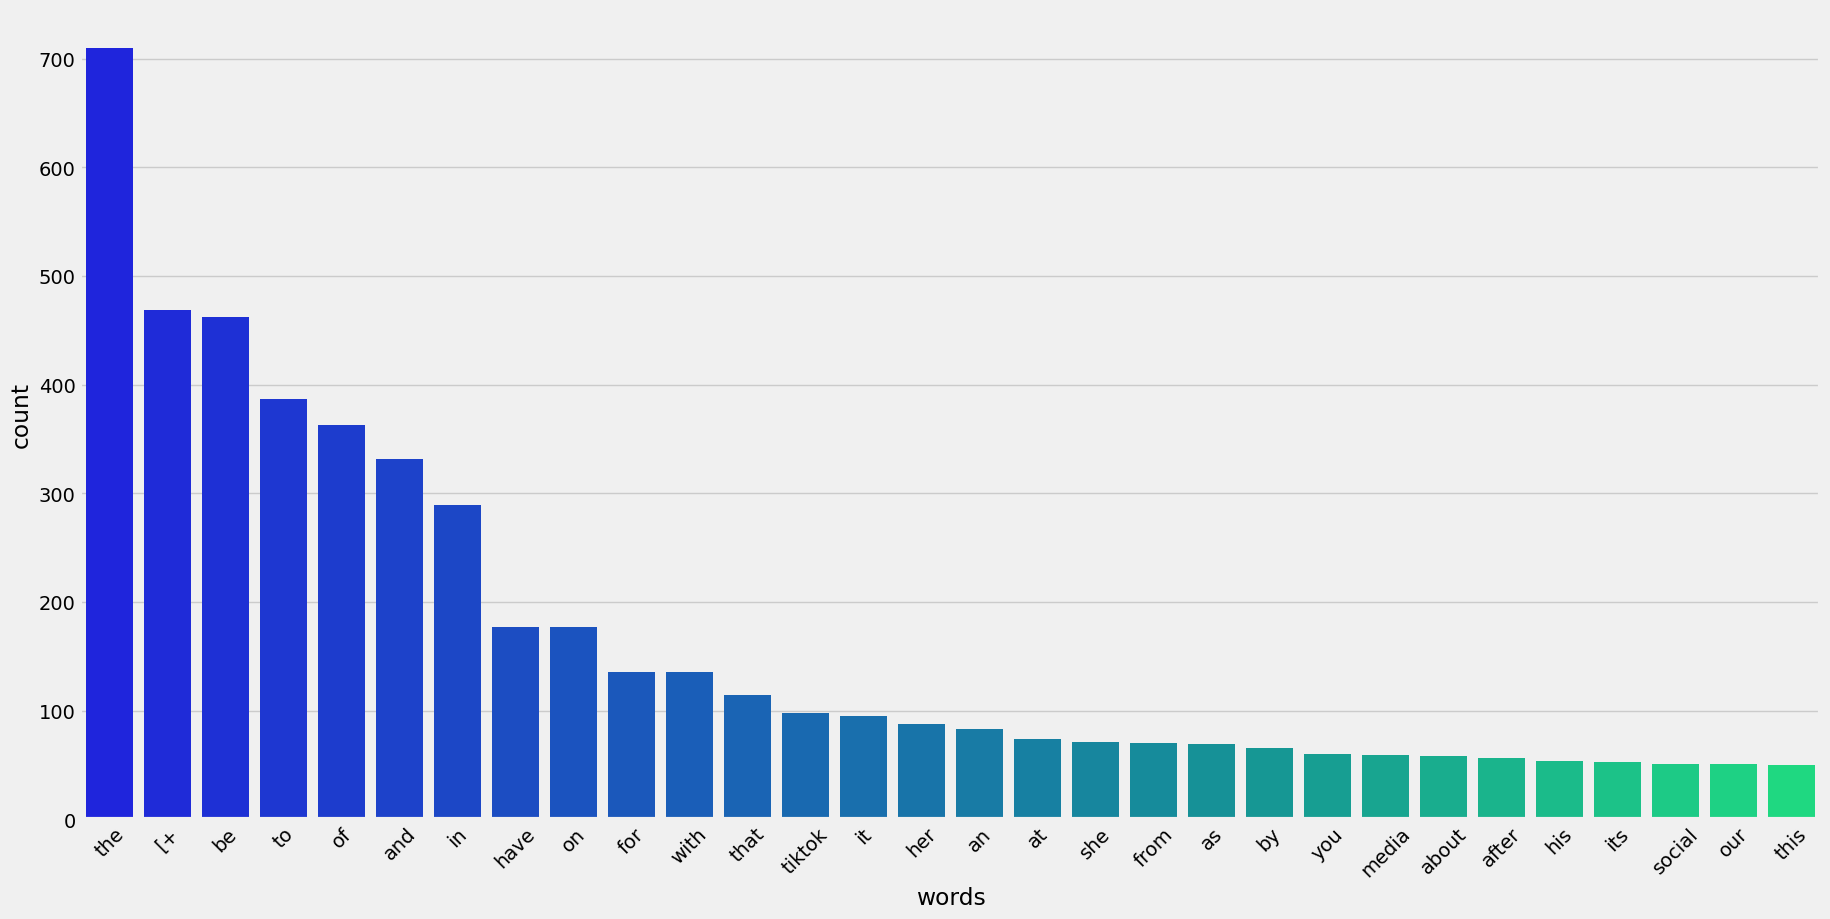

In [ ]:
#Imports counter, needs to be done each code block its used for some reason
from collections import Counter

#joins all words into a corpus
content_words = ','.join(list(df_content_lda['content_clean'].values))

#counts and finds the 30 most frequent words
Counter = Counter(content_words.split())
most_frequent = Counter.most_common(30)

#displays bar plot of frequent words
fig = plt.figure(1, figsize = (20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [ ]:
#Excludes words that are not relevant like 'the', 'be', etc.
stopwords_list2 = stopwords.words('english')
stopwords_list2.extend(['[+', 'tiktok', 'media', 'social', 'li', 'getty', 'image', 'mental', 'health', '2023'])

df_content_lda['content_clean_list'] = [[word for word in line if word not in stopwords_list2] for line in df_content_lda['content_clean_list']]
df_content_lda['content_clean'] = list(map(to_string, df_content_lda['content_clean_list']))

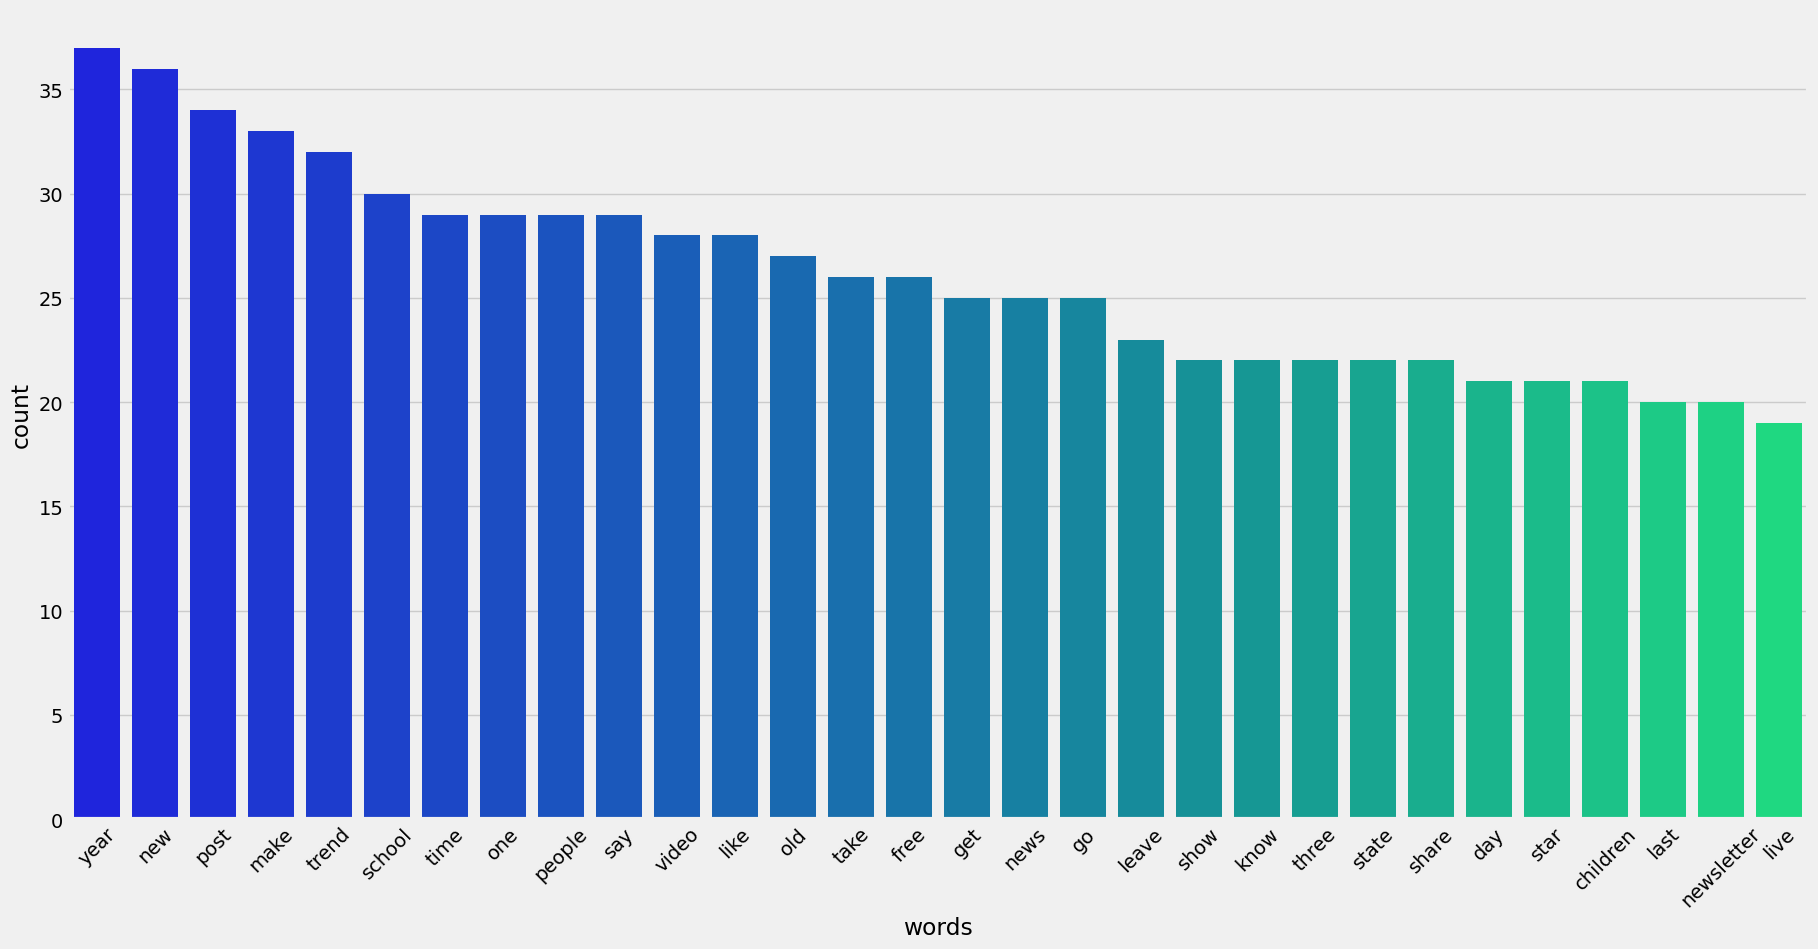

In [ ]:
#Prints another bar plot without stopwords
from collections import Counter

#Joins text together
content_words = ','.join(list(df_content_lda['content_clean'].values))

#Count each word
Counter = Counter(content_words.split())
most_frequent = Counter.most_common(30)

#Bar plot for frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns = ("words","count"))
sns.barplot(x='words', y='count', data = _, palette ='winter')
plt.xticks(rotation=45);

(0.0, 1.0, 0.0, 1.0)

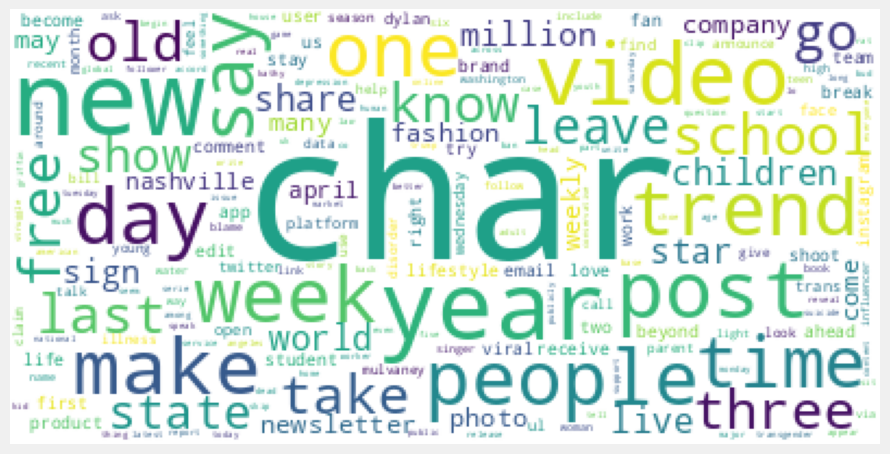

In [ ]:
#Generates word cloud
wordcloud = WordCloud(background_color="white",
                      max_words = 200,
                      contour_width = 8,
                      contour_color= "steelblue",
                      collocations=False).generate(content_words)

#Visualizes the word cloud
fig = plt.figure(1, figsize = (10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
#Creates dictionary for bag of words, this prepares it for the
#lda algorithm
id2word = gensim.corpora.Dictionary(df_content_lda['content_clean_list'])

#Creates a Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_content_lda['content_clean_list']]

In [ ]:
#The topic coherence score tells us the right amount of topics there are
from gensim.models import CoherenceModel

#Compute Coherence Sore
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              iterations=50,
                                              num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=df_content_lda['content_clean_list'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda);

In [ ]:
#Create a datframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

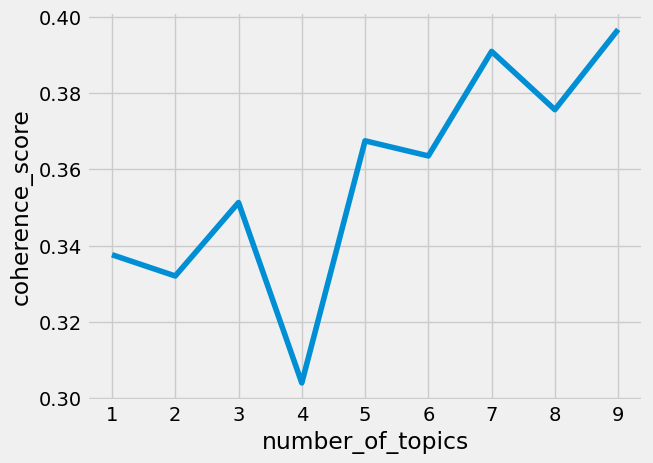

In [ ]:
#Prints a line plot
#After the line intially peaks and then dips is the amount of topics
#we should use
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [ ]:
#defines number of topics
#Although 3 is the initial peak, I chose 5 for more results.
n_topics = 5

#runs the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=n_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)

In [ ]:
#Prints words occurrence and their relative weight in each topic
for idx, topic in lda_model.print_topics(-1):
  print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.034*"char" + 0.017*"leave" + 0.014*"comment" + 0.012*"skip" + 0.012*"shoot" + 0.011*"video" + 0.011*"post" + 0.011*"dylan" + 0.010*"one" + 0.010*"say"
Topic: 1 Word: 0.031*"char" + 0.011*"make" + 0.009*"new" + 0.008*"bill" + 0.007*"get" + 0.007*"number" + 0.006*"sign" + 0.006*"feel" + 0.006*"uk" + 0.006*"washington"
Topic: 2 Word: 0.029*"char" + 0.018*"school" + 0.014*"nashville" + 0.013*"people" + 0.009*"state" + 0.009*"show" + 0.008*"monday" + 0.007*"like" + 0.006*"conservatives" + 0.006*"christian"
Topic: 3 Word: 0.037*"char" + 0.017*"year" + 0.011*"become" + 0.011*"old" + 0.010*"three" + 0.009*"come" + 0.008*"week" + 0.008*"live" + 0.008*"love" + 0.007*"famous"
Topic: 4 Word: 0.033*"char" + 0.010*"weeks" + 0.010*"time" + 0.010*"call" + 0.008*"million" + 0.008*"photo" + 0.008*"know" + 0.008*"13" + 0.007*"may" + 0.007*"april"


Commenting out because the import statement was breaking code

In [ ]:
#Imports and enables notebook to run visualization - prints pretty visual
#It is interactive
#import pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()

#vis = pyLDAvis.gensim_models.prepare(lda_model,
#                                    corpus,
#                                    dictionary=lda_model.id2word)
#vis



---



This section will be preparing the topics from the section that ran the LDA on the description portion from the api for Social Network Anaylsis

In [ ]:
#Combines indexes of the arrays that were preprocessed above to make a list of edges
edge_list0 = []
for i in cleaned_topic0[:]:
  for j in cleaned_topic0[:]:
    if i != j:
      if j != i:
        edge_list0.append(i + "," + j)
  cleaned_topic0.pop(0)
print(edge_list0)

edge_list1 = []
for i in cleaned_topic1[:]:
  for j in cleaned_topic1[:]:
    if i != j:
      if j != i:
        edge_list1.append(i + "," + j)
  cleaned_topic1.pop(0)
print(edge_list1)

edge_list2 = []
for i in cleaned_topic2[:]:
  for j in cleaned_topic2[:]:
    if i != j:
      if j != i:
        edge_list2.append(i + "," + j)
  cleaned_topic2.pop(0)
print(edge_list2)

edge_list3 = []
for i in cleaned_topic3[:]:
  for j in cleaned_topic3[:]:
    if i != j:
      if j != i:
        edge_list3.append(i + "," + j)
  cleaned_topic3.pop(0)
print(edge_list3)

edge_list4 = []
for i in cleaned_topic4[:]:
  for j in cleaned_topic4[:]:
    if i != j:
      if j != i:
        edge_list4.append(i + "," + j)
  cleaned_topic4.pop(0)
print(edge_list4)

edge_list5 = []
for i in cleaned_topic5[:]:
  for j in cleaned_topic5[:]:
    if i != j:
      if j != i:
        edge_list5.append(i + "," + j)
  cleaned_topic5.pop(0)
print(edge_list5)


'mulvaney'

'trans'

'find'

'dylan'

'week'

'video'

'viral'

'long'

'last'

'call'

['mulvaney,trans', 'mulvaney,find', 'mulvaney,dylan', 'mulvaney,week', 'mulvaney,video', 'mulvaney,viral', 'mulvaney,long', 'mulvaney,last', 'mulvaney,call', 'trans,find', 'trans,dylan', 'trans,week', 'trans,video', 'trans,viral', 'trans,long', 'trans,last', 'trans,call', 'find,dylan', 'find,week', 'find,video', 'find,viral', 'find,long', 'find,last', 'find,call', 'dylan,week', 'dylan,video', 'dylan,viral', 'dylan,long', 'dylan,last', 'dylan,call', 'week,video', 'week,viral', 'week,long', 'week,last', 'week,call', 'video,viral', 'video,long', 'video,last', 'video,call', 'viral,long', 'viral,last', 'viral,call', 'long,last', 'long,call', 'last,call']


'get'

'post'

'come'

'look'

'top'

'first'

'one'

'brand'

'really'

'appear'

['get,post', 'get,come', 'get,look', 'get,top', 'get,first', 'get,one', 'get,brand', 'get,really', 'get,appear', 'post,come', 'post,look', 'post,top', 'post,first', 'post,one', 'post,brand', 'post,really', 'post,appear', 'come,look', 'come,top', 'come,first', 'come,one', 'come,brand', 'come,really', 'come,appear', 'look,top', 'look,first', 'look,one', 'look,brand', 'look,really', 'look,appear', 'top,first', 'top,one', 'top,brand', 'top,really', 'top,appear', 'first,one', 'first,brand', 'first,really', 'first,appear', 'one,brand', 'one,really', 'one,appear', 'brand,really', 'brand,appear', 'really,appear']


'say'

'transgender'

'would'

'think'

'write'

'like'

'go'

'face'

'ban'

'yet'

['say,transgender', 'say,would', 'say,think', 'say,write', 'say,like', 'say,go', 'say,face', 'say,ban', 'say,yet', 'transgender,would', 'transgender,think', 'transgender,write', 'transgender,like', 'transgender,go', 'transgender,face', 'transgender,ban', 'transgender,yet', 'would,think', 'would,write', 'would,like', 'would,go', 'would,face', 'would,ban', 'would,yet', 'think,write', 'think,like', 'think,go', 'think,face', 'think,ban', 'think,yet', 'write,like', 'write,go', 'write,face', 'write,ban', 'write,yet', 'like,go', 'like,face', 'like,ban', 'like,yet', 'go,face', 'go,ban', 'go,yet', 'face,ban', 'face,yet', 'ban,yet']


'become'

'shoot'

'show'

'school'

'use'

'community'

'conservatives'

'every'

'know'

['become,shoot', 'become,show', 'become,school', 'become,use', 'become,community', 'become,conservatives', 'become,every', 'become,know', 'shoot,show', 'shoot,school', 'shoot,use', 'shoot,community', 'shoot,conservatives', 'shoot,every', 'shoot,know', 'show,school', 'show,use', 'show,community', 'show,conservatives', 'show,every', 'show,know', 'school,use', 'school,community', 'school,conservatives', 'school,every', 'school,know', 'use,community', 'use,conservatives', 'use,every', 'use,know', 'community,conservatives', 'community,every', 'community,know', 'conservatives,every', 'conservatives,know', 'every,know']


'people'

'health'

'new'

'nashville'

'two'

'online'

'million'

'love'

'time'

'gun'

['people,health', 'people,new', 'people,nashville', 'people,two', 'people,online', 'people,million', 'people,love', 'people,time', 'people,gun', 'health,new', 'health,nashville', 'health,two', 'health,online', 'health,million', 'health,love', 'health,time', 'health,gun', 'new,nashville', 'new,two', 'new,online', 'new,million', 'new,love', 'new,time', 'new,gun', 'nashville,two', 'nashville,online', 'nashville,million', 'nashville,love', 'nashville,time', 'nashville,gun', 'two,online', 'two,million', 'two,love', 'two,time', 'two,gun', 'online,million', 'online,love', 'online,time', 'online,gun', 'million,love', 'million,time', 'million,gun', 'love,time', 'love,gun', 'time,gun']


'make'

'year'

'life'

'world'

'famous'

'live'

'report'

'see'

'three'

'children'

['make,year', 'make,life', 'make,world', 'make,famous', 'make,live', 'make,report', 'make,see', 'make,three', 'make,children', 'year,life', 'year,world', 'year,famous', 'year,live', 'year,report', 'year,see', 'year,three', 'year,children', 'life,world', 'life,famous', 'life,live', 'life,report', 'life,see', 'life,three', 'life,children', 'world,famous', 'world,live', 'world,report', 'world,see', 'world,three', 'world,children', 'famous,live', 'famous,report', 'famous,see', 'famous,three', 'famous,children', 'live,report', 'live,see', 'live,three', 'live,children', 'report,see', 'report,three', 'report,children', 'see,three', 'see,children', 'three,children']


This box below prepares the edge pairs to be outputted into a csv file which can then be inserted into Gephi.

In [ ]:
#Takes the list of edges and converts it to an array that can be converted into a dataframe
output_array0 = np.array(edge_list0)
output_array1 = np.array(edge_list1)
output_array2 = np.array(edge_list2)
output_array3 = np.array(edge_list3)
output_array4 = np.array(edge_list4)
output_array5 = np.array(edge_list5)

#converts the edge array into a single column dataframe
edge_df0 = pd.DataFrame(output_array0)
edge_df1 = pd.DataFrame(output_array1)
edge_df2 = pd.DataFrame(output_array2)
edge_df3 = pd.DataFrame(output_array3)
edge_df4 = pd.DataFrame(output_array4)
edge_df5 = pd.DataFrame(output_array5)

#Adds a header to the column named Source
edge_df0.columns = ['Source']
edge_df1.columns = ['Source']
edge_df2.columns = ['Source']
edge_df3.columns = ['Source']
edge_df4.columns = ['Source']
edge_df5.columns = ['Source']

#Converts the single dataframe column to two columns
edge_df0 = pd.DataFrame(edge_df0['Source'].str.split(',').values.tolist())
edge_df1 = pd.DataFrame(edge_df1['Source'].str.split(',').values.tolist())
edge_df2 = pd.DataFrame(edge_df2['Source'].str.split(',').values.tolist())
edge_df3 = pd.DataFrame(edge_df3['Source'].str.split(',').values.tolist())
edge_df4 = pd.DataFrame(edge_df4['Source'].str.split(',').values.tolist())
edge_df5 = pd.DataFrame(edge_df5['Source'].str.split(',').values.tolist())

edge_df0.columns = ['Source', 'Target']
edge_df1.columns = ['Source', 'Target']
edge_df2.columns = ['Source', 'Target']
edge_df3.columns = ['Source', 'Target']
edge_df4.columns = ['Source', 'Target']
edge_df5.columns = ['Source', 'Target']

#Adds a third column specifying that the edge is undirected
edge_df0['Type'] = 'Undirected'
edge_df1['Type'] = 'Undirected'
edge_df2['Type'] = 'Undirected'
edge_df3['Type'] = 'Undirected'
edge_df4['Type'] = 'Undirected'
edge_df5['Type'] = 'Undirected'

In [ ]:
#Merges the fully processed edge list dataframes
edge_df_merged = pd.concat([edge_df0, edge_df1, edge_df2, edge_df3, edge_df4, edge_df5], ignore_index = True,sort=False)

In [ ]:
#Prints the edge list df to a csv I can import to Gephi
edge_df_merged.to_csv('/drive/My Drive/Colab Notebooks/edge.csv')

Link to picture: (https://drive.google.com/file/d/1Od8b1yVbL5oDz_69uoOQ03dPAToku2FE/view?usp=sharing)

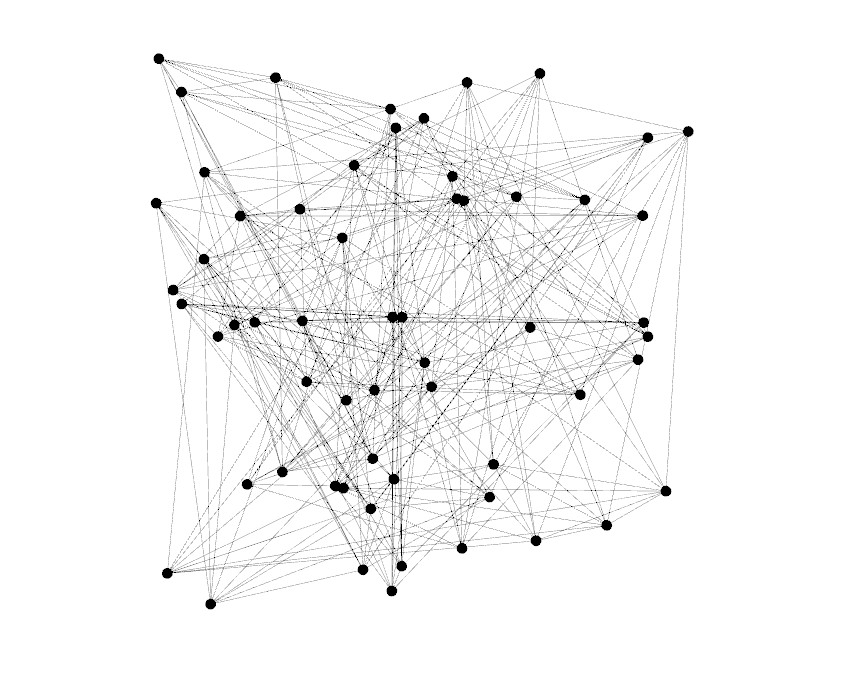